In [65]:
using ExprOptimization

In [66]:
grammar = @grammar begin
    Real = x
    Real = Real * Real
    Real = Real + Real
    Real = Real - Real
    Real = _(Base.rand(1.0:5.0))
end

ExprRules.Grammar(Any[:x, :(Real * Real), :(Real + Real), :(Real - Real), :(_(Base.rand(1.0:5.0)))], Symbol[:Real, :Real, :Real, :Real, :Real], Bool[true, false, false, false, true], Bool[false, false, false, false, true], Dict(:Real=>[1, 2, 3, 4, 5]), Array{Symbol,1}[Symbol[], Symbol[:Real, :Real], Symbol[:Real, :Real], Symbol[:Real, :Real], Symbol[]])

In [67]:
ground_truth(x) = x + 2
function ExprOptimization.loss(tree::RuleNode)
    ex = get_executable(tree, grammar)
    los = 0.0
    global x
    for x = -5.0:0.1:5.0
        los += abs2(eval(ex) - ground_truth(x))
    end
    los
end

In [68]:
srand(0)
p = GeneticProgramParams(10, 5, 4, 0.3, 0.3, 0.3)

ExprOptimization.GeneticProgram.GeneticProgramParams(10, 5, 4, [0.3, 0.3, 0.3], ExprOptimization.GeneticProgram.RandomInit(), ExprOptimization.GeneticProgram.TournamentSelection(2))

In [69]:
using ExprOptimization.GeneticProgram
pop = GeneticProgram.initialize(p.init_method, p.pop_size, grammar, :Real, p.max_depth)

10-element Array{ExprRules.RuleNode,1}:
 1,                          
 2{5,5}                      
 5,                          
 1,                          
 4{1,3{3{1,5}1}}             
 5,                          
 1,                          
 1,                          
 4{4{3{5,1}1}4{4{5,1}3{5,1}}}
 3{1,4{4{1,5}3{5,1}}}        

In [70]:
losses = zeros(p.pop_size)
best_tree, best_loss = GeneticProgram.evaluate!(pop, losses, pop[1], Inf)

(1,, 404.0)

In [71]:
losses

10-element Array{Float64,1}:
   404.0
   404.0
   404.0
   404.0
   858.5
  1262.5
  4494.5
  5959.0
 10100.0
 17927.5

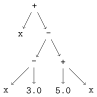

In [72]:
srand(3)
ind1 = GeneticProgram.select(p.select_method, pop, losses)
display(ind1, grammar)

In [73]:
srand(5)
ind2 = GeneticProgram.select(p.select_method, pop, losses)
display(ind2, grammar)

4.0

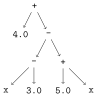

In [74]:
srand(8)
child = GeneticProgram.crossover(ind1, ind2, grammar)
display(child, grammar)


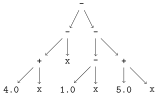

In [75]:
srand(4)
ind3 = GeneticProgram.select(p.select_method, pop, losses)
display(ind3, grammar)

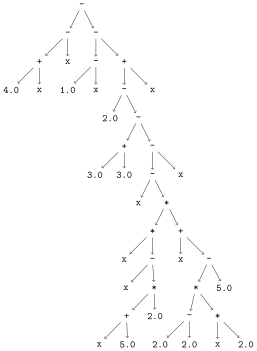

In [76]:
srand(2)
child3 = GeneticProgram.mutation(ind3, grammar, 4)
display(child3, grammar)